## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">فضاهای رنگی در OpenCV</div>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## More about RGB(or BGR) images

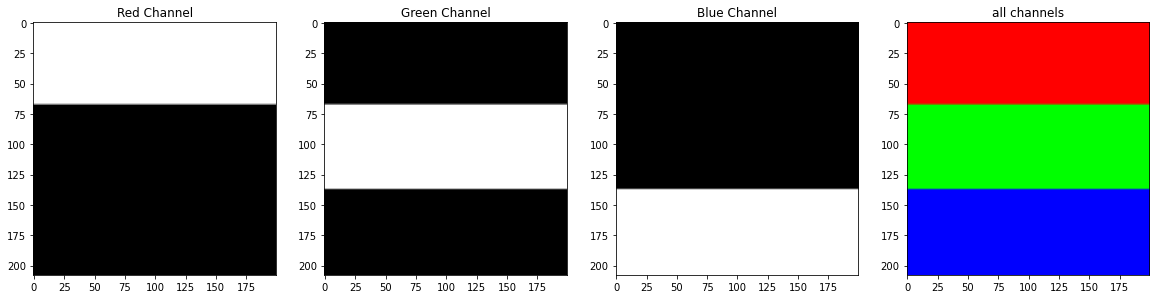

In [4]:
# Split the image into the B,G,R components
img = cv2.imread("./images/color.png")
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(img[:,:,::-1]);plt.title("all channels");

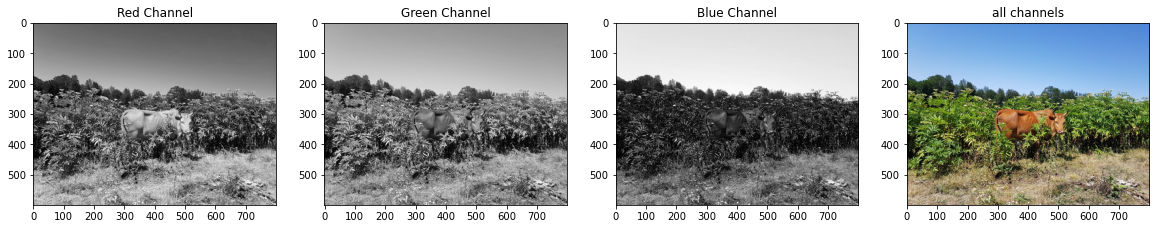

In [5]:
# Split the image into the B,G,R components
img = cv2.imread("./images/input.jpg")
b,g,r = cv2.split(img)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(img[:,:,::-1]);plt.title("all channels");

### merge channels to form an image

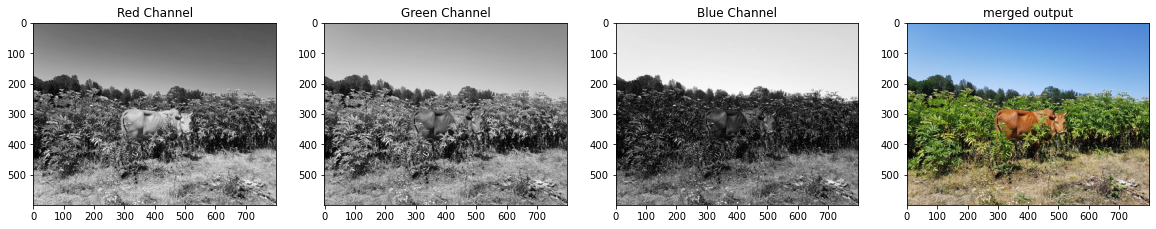

In [6]:
# Let's re-make the original image, 
merged = cv2.merge([b, g, r]) 
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("merged output");

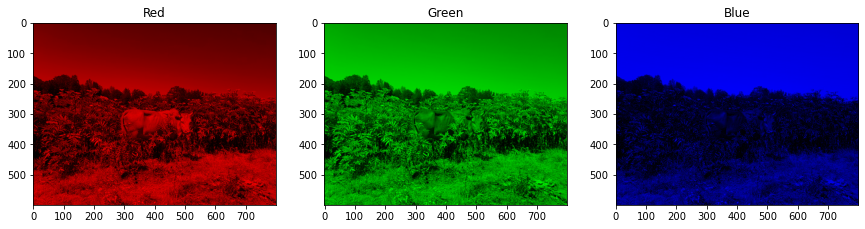

In [10]:
zeros = np.zeros_like(r, 'uint8')
    
red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red[...,::-1],cmap='gray');plt.title("Red");
plt.subplot(142);plt.imshow(green[...,::-1],cmap='gray');plt.title("Green");
plt.subplot(143);plt.imshow(blue[...,::-1],cmap='gray');plt.title("Blue");



### Modifying individual Channel

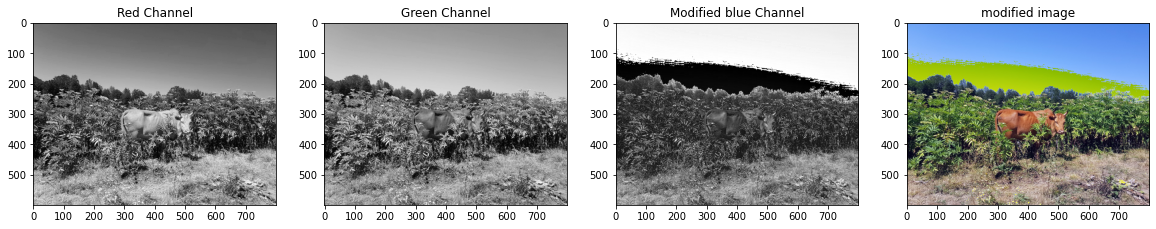

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Split the image into the B,G,R components
img = cv2.imread("./images/input.jpg")
b,g,r = cv2.split(img)

# Let's re-make the original image, 
modified_b = b+20
merged = cv2.merge([modified_b, g, r]) 
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("modified image");

can you guess what is the problem?!

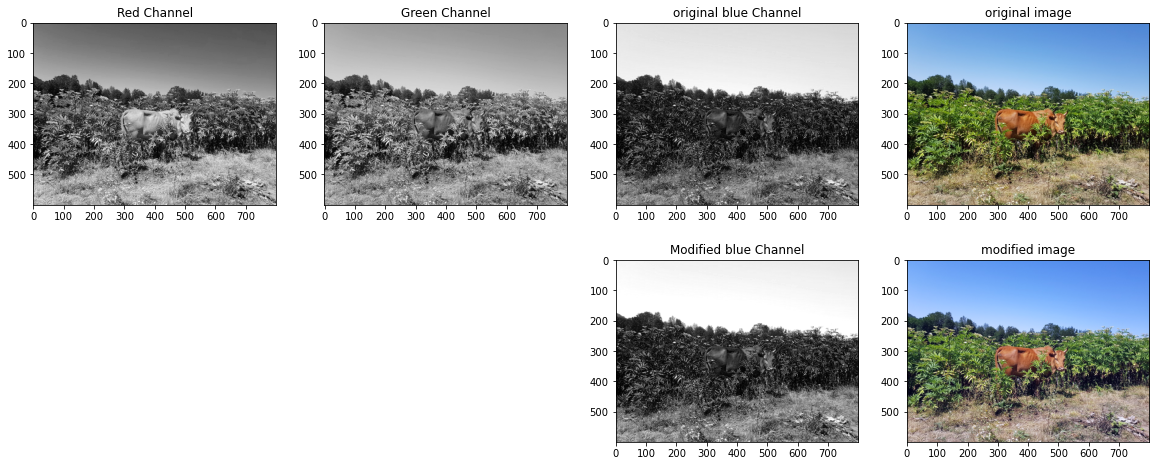

In [48]:
# Let's re-make the original image, 
modified_b = b.astype('int16') + 20
modified_b = np.minimum(modified_b, 255)
modified_b = modified_b.astype('uint8')

merged = cv2.merge([modified_b, g, r]) 
# Show the channels
plt.figure(figsize=[20,8])
plt.subplot(241);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(242);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(243);plt.imshow(b,cmap='gray');plt.title("original blue Channel");
plt.subplot(244);plt.imshow(img[:,:,::-1]);plt.title("original image");

# Show the modified channel and image
plt.subplot(247);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");
plt.subplot(248);plt.imshow(merged[:,:,::-1]);plt.title("modified image");


Better alternative (see [10-Arithmetic Operations](#) notebooks)

In [52]:
assert np.all(modified_b == cv2.add(b, 20))

### Another useful color space is HSV 
<ul>
<li>Hue – Color Value (0 – 179)</li>
<li>Saturation – Vibrancy of color (0-255)</li>
<li>Value – Brightness or intensity (0-255)</li>
</ul>
<img src="./lecture_images/HSV_color_solid_cylinder.png" />
Infact HSV is very useful in color filtering.

In [54]:
#H: 0 - 180, S: 0 - 255, V: 0 - 255

img = cv2.imread('./images/input.jpg')
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

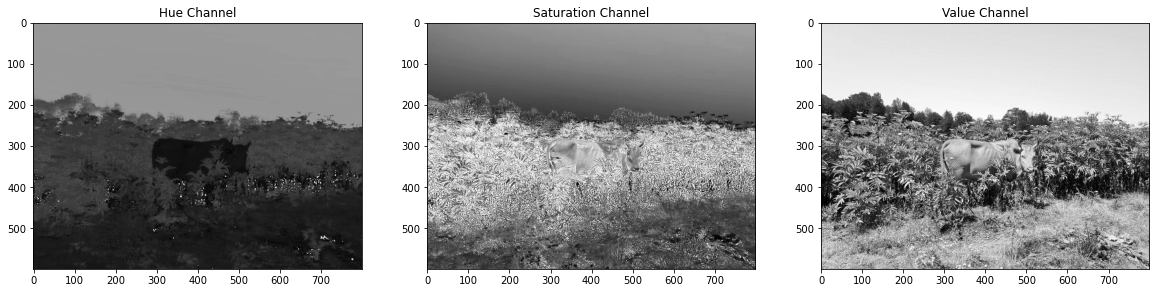

In [55]:
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(hsv_image[:, :, 0],cmap='gray');plt.title("Hue Channel");
plt.subplot(132);plt.imshow(hsv_image[:, :, 1],cmap='gray');plt.title("Saturation Channel");
plt.subplot(133);plt.imshow(hsv_image[:, :, 2],cmap='gray');plt.title("Value Channel");


Text(0.5, 1.0, 'original image')

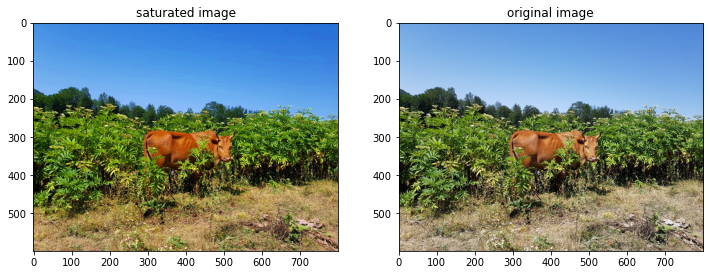

In [58]:
saturated_image = cv2.merge([hsv_image[:, :, 0], cv2.add(hsv_image[:, :, 1], 50), hsv_image[:, :, 2]])
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(saturated_image[...,::-1])
plt.title('saturated image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')
                            


Text(0.5, 1.0, 'original image')

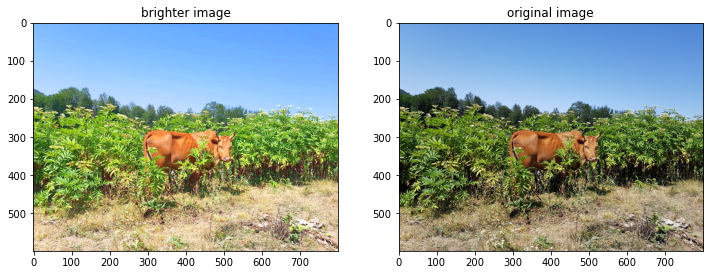

In [59]:
brighter_image = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1], cv2.add(hsv_image[:, :, 2], 50)])
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(brighter_image[...,::-1])
plt.title('brighter image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')
                            


#### You can view a list of color converisons here, but keep in mind you won't ever use or need many of these

https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html